# Part 1: 

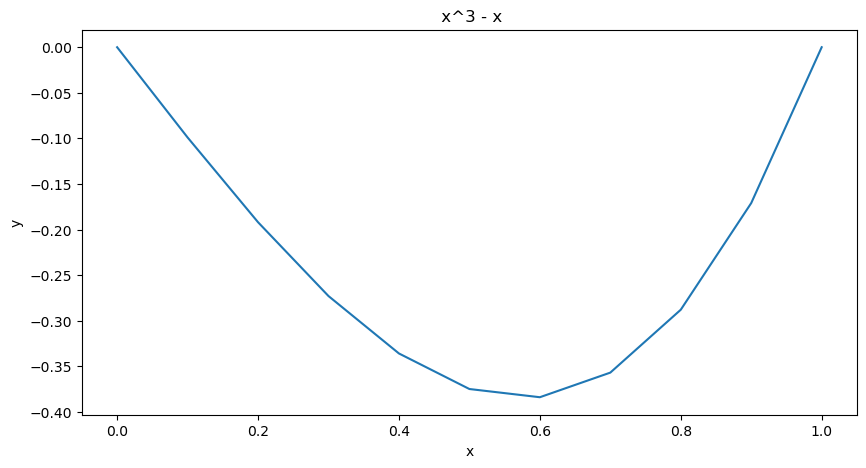

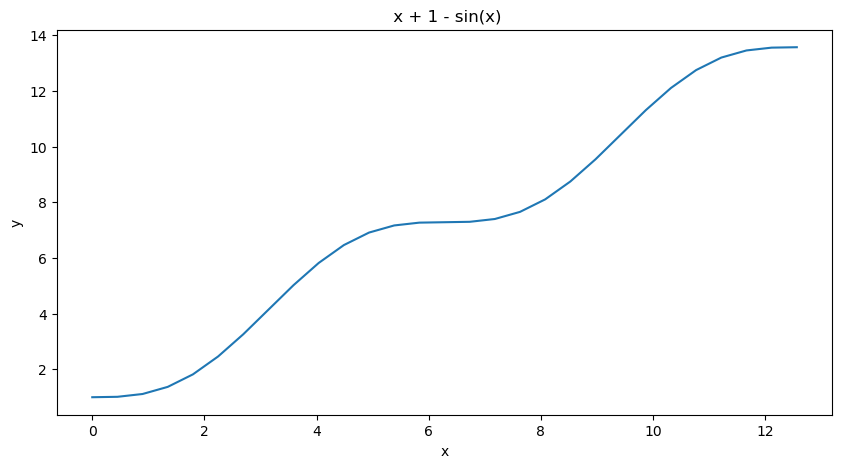

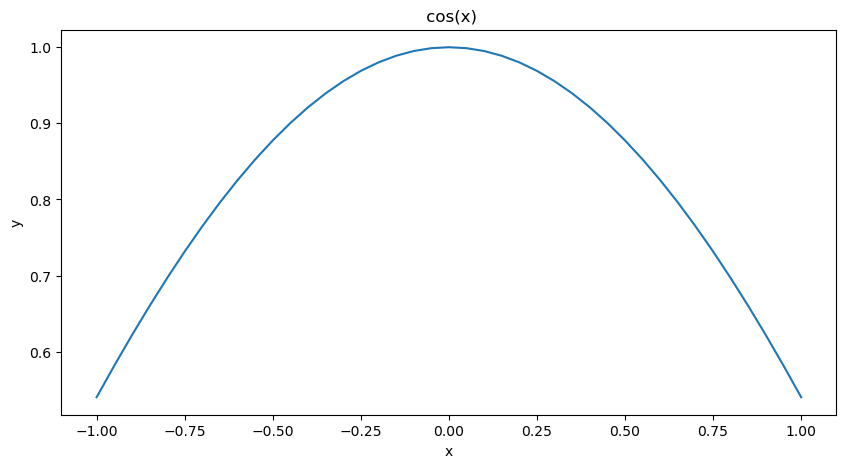

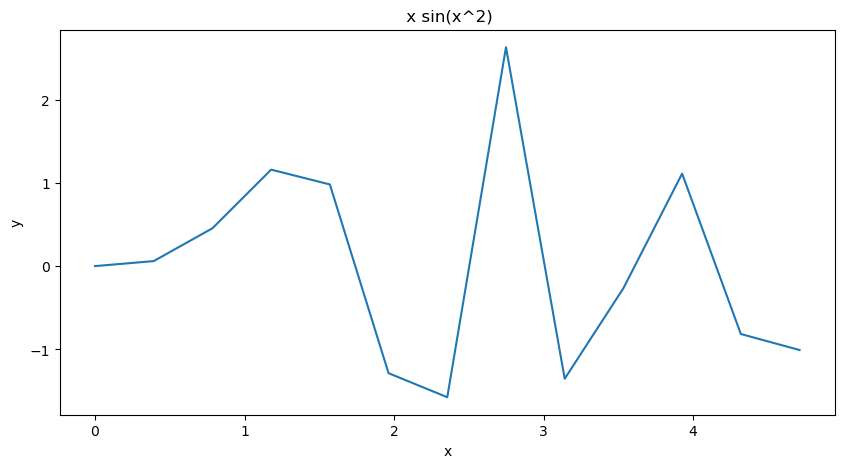

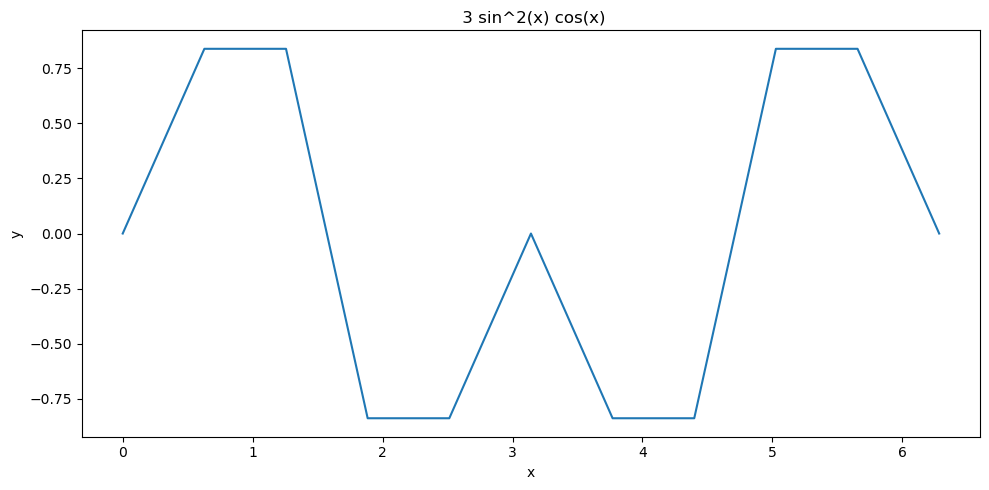

In [2]:
# import modules:
import numpy as np
import matplotlib.pyplot as plt

# MAKE SURE THE FILES ARE IN THE SAME LOCATIONS AS THIS FILE'S LOCATION
def read_data(filename):
    # Load CSV data into an array (skip the first 3 rows)
    data = np.loadtxt(filename, delimiter=',', skiprows=3)
    
    # Load headers separately
    headers = np.loadtxt(filename, delimiter=',', dtype=str, max_rows=1)
    
    # Load labels separately
    labels = np.loadtxt(filename, delimiter=',', dtype=str, skiprows=1, max_rows=1)
    
    return data, labels, headers

# Looping through each file for plot:
filenames = ['tut8_data1.csv', 'tut8_data2.csv', 'tut8_data3.csv', 'tut8_data4.csv', 'tut8_data5.csv']

for i, filename in enumerate(filenames):
    data, labels, headers = read_data(filename)

    x = data[:, 0]
    y = data[:, 1]

    fig, ax = plt.subplots(figsize = (10,5)) # creating a figure, and setting its size:
    
    ax.plot(x,y) # plotting
    
    # setting title and labelling
    ax.set_title(headers[1]) 
    ax.set_xlabel("x") 
    ax.set_ylabel("y")

# saving the figure
fig.savefig(f"tut_8_p1_{i+1}_(mkfman002).png")

# making the plot tight
plt.tight_layout()
plt.show()  # show the plot


# Part 2:

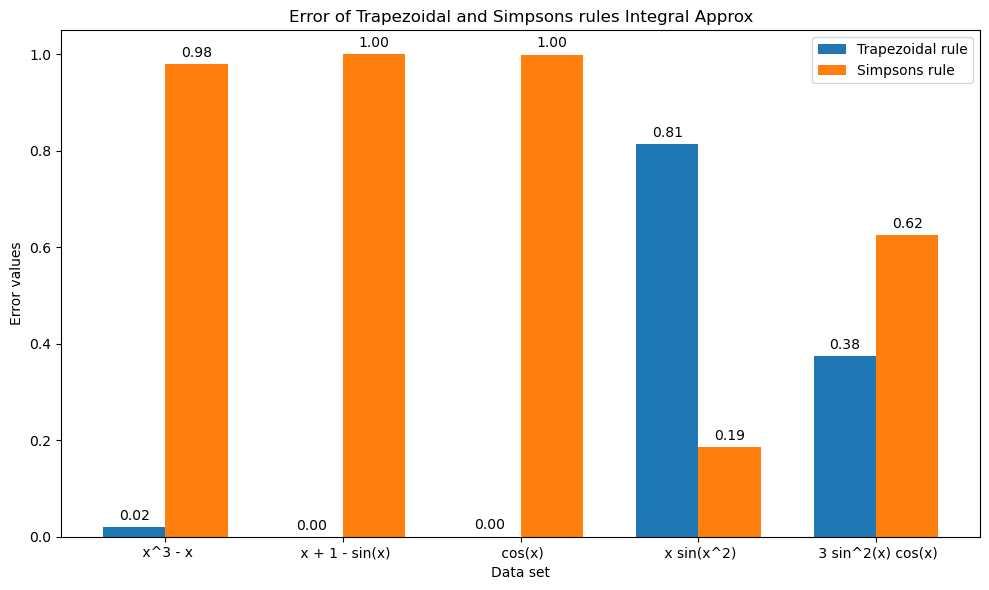

In [3]:
# Trapezoidal rule Function:
def trapezoidal_rule(x, y):
    # Calculate the width of each interval
    h = x[1] - x[0]
    
    return h*(0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1]) # From Kira:
        
# Simpson's rule Function:
def simpsons_rule(x, y):
    # Calculate the width of each interval
    h = x[1] - x[0]
    
    return h*(y[0] + y[-1] + 2*np.sum(y[2:-1:2]) + 4*np.sum(y[1:-1:2]))/2 # From Kira:

trape_approx = np.zeros(5) # array to be updated with trapezoidal approximation
simp_approx = np.zeros(5) # array to be updated with Simpsons approx
exact_val = np.zeros(5) # array to be updated with exact solution
normal_trape = np.zeros(5) # array to be updated with normalized trapezoidal approx
normal_simp = np.zeros(5) # array to be updated with normalized simpsons approx
functions = [] # empty list to store the relations for easy access

# looping through each file:
filenames = ['tut8_data1.csv', 'tut8_data2.csv', 'tut8_data3.csv', 'tut8_data4.csv', 'tut8_data5.csv']

for i, filename in enumerate(filenames):
    data, labels, headers = read_data(filename)

    x = data[:, 0]
    y = data[:, 1]

    # updating zoros arrays and empty list:
    trape_approx[i] = trapezoidal_rule(x, y) 
    simp_approx[i] = simpsons_rule(x, y)
    exact_val[i] = float(labels[1])
    functions.append(headers[1])

    # Calculating the absolute errors for both methods:
    trape_error = np.abs(exact_val - trape_approx)
    simp_error = np.abs(exact_val - simp_approx)

    div = (trape_error[i] + simp_error[i]) # summing the trapezoidal and simpsons approx for normalization
    
    # Set to zero when dividing by zero to avaoid error
    if div == 0:
        normal_trape[i] = 0  
        normal_simp[i] = 0   
    else:
        normal_trape[i] = trape_error[i] / div
        normal_simp[i] = simp_error[i] / div

# Defining the width of the bars
bar_width = 0.35

# Creating array of evenly spaced values to determine the position of bars
x = np.arange(len(functions))

plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plotting
bars1 = plt.bar(x - bar_width/2, normal_trape, bar_width, label='Trapezoidal rule')
bars2 = plt.bar(x + bar_width/2, normal_simp, bar_width, label='Simpsons rule')

# Customization
plt.xlabel('Data set')
plt.ylabel('Error values')
plt.title('Error of Trapezoidal and Simpsons rules Integral Approx')
plt.xticks(x, functions)  # Replace x ticks with categories
plt.legend()

# Function to add text labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:.2f}'.format(height),  # Format height to two decimal places
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Adding text labels for both sets of bars
add_labels(bars1)
add_labels(bars2)

# Displaying and Saving
plt.savefig("tut8_p2(mkfman002).png")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # or plt.savefig('grouped_bar_graph_with_values.png')

# Finalize
plt.close()
